## Women's E-Commerce Clothing Reviews

Prepared by Debora Callegari

### Introduction

In this Notebook, text reviews written by customers taken from [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) will be analyzed to predict the scores for women's clothes using Regression model.

### Imports

In [1]:
#Importing the necessary packages:

# Basic libraries
import numpy as np
import pandas as pd

# Graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Loading data

In [2]:
# Loading data from csv file
data = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The previous output shows the first 5 rows of the dataset. Also, the description of the dataset from the Kaggle page is presented below:

"*This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with 'retailer'.*"

In [4]:
print("The dimension of the data is: ", data.shape)

The dimension of the data is:  (23486, 10)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


### Step 2: Data Cleaning

The results in the previous description shows that some data cleaning will be needed before performing the analysis. First, let's rename the columns using lower case and replacing the white space with the character 'underscore'.

In [7]:
# Getting the columns' names
data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
# Making copy of the data to prepare and clean it
new_data = data.copy()

In [9]:
# Renaming columns in lowercase
new_data.rename(columns=lambda x: x.lower(), inplace=True)

In [10]:
new_data.columns

Index(['clothing id', 'age', 'title', 'review text', 'rating',
       'recommended ind', 'positive feedback count', 'division name',
       'department name', 'class name'],
      dtype='object')

In [11]:
# Renplcacing the white space from columns' names
new_data.columns = new_data.columns.str.replace(' ', '_')

In [12]:
# Checking for NaN values in each column
new_data.isna().sum()

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

In [13]:
# Checking for NaN values in all data frame
new_data.isna().sum().sum()

4697

Considering the results above, I decided to drop the columns assigned as 'review_text', 'division_name', 'department_name' and 'class_name' with missing values because I can not make assumptions about what the meaning of those columns and they will not affect my results in the future as they are 887 values, which represents 3.77% of the total dataset.

In [14]:
# Dropping subset of columns that have missing values
new_data.dropna(subset=['review_text','division_name', 'department_name','class_name'], inplace=True)
new_data.isna().sum()

clothing_id                   0
age                           0
title                      2966
review_text                   0
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                 0
department_name               0
class_name                    0
dtype: int64

In [15]:
new_data.shape

(22628, 10)

On the other hand, for the missing values for the column 'title', I think that this column can be useful for the model in the future, so for the NaN values I will fill any NaNs by calling them 'Null'.

In [16]:
# Any NaN values in the column, I'll relabel as 'Null'
new_data['title'].fillna('Null', inplace=True)

In [17]:
new_data['title'].isna().any()

False

In [18]:
new_data.isna().any()

clothing_id                False
age                        False
title                      False
review_text                False
rating                     False
recommended_ind            False
positive_feedback_count    False
division_name              False
department_name            False
class_name                 False
dtype: bool

### Step 3: Exploratory Data Analysis

In this section I'll do some exploratory data analysis over the dataset.

#### 3.1. Looking amount of Age column

In [19]:
new_data['age'].describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: age, dtype: float64

It is possible to see that the age range is from 18 to 99 years and the average age is around 43 years old for people that leave most of the reviews.

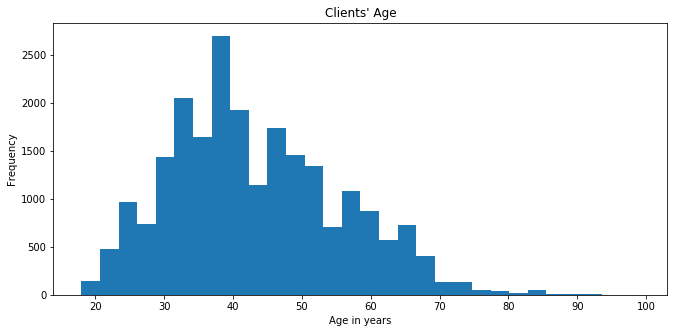

In [20]:
# Plotting histogram to show the distribution of age
plt.figure(figsize = (11,5))
plt.hist(new_data["age"],bins=30)
plt.xlabel("Age in years")
plt.ylabel("Frequency")
plt.title("Clients' Age")
plt.show();

#### 3.2. Looking Title column

In [21]:
new_data['title'].describe()

count     22628
unique    13984
top        Null
freq       2966
Name: title, dtype: object

In [22]:
new_data['title'].value_counts()

Null                                               2966
Love it!                                            136
Beautiful                                            95
Love                                                 88
Love!                                                83
Beautiful!                                           72
Beautiful dress                                      60
Love it                                              59
Love this dress!                                     53
Gorgeous                                             53
Cute top                                             52
Disappointed                                         51
Great dress                                          49
Perfect                                              49
Super cute                                           44
Adorable                                             43
Great top                                            42
Not for me                                      

The output above shows the frequency for each unique title on the dataset. We know that the majority of review text does not have a title as we can see a total of 2,966 without title, however, the second-highest frequency is the text reviews with the title "Love it!", which shows the positive experience from the customers.

#### 3.2.1. Generating WordCloud

WordCloud is a good tool to visualize the frequency or importance of each word that is shown in the Title column. It is possible to see the positive experience from customers when we read, for example, the words 'love', 'beautiful', 'cute' and 'perfect lovely'. Also, we can have the confirmation that 'top' and 'dress' are the products with the highest received reviews.

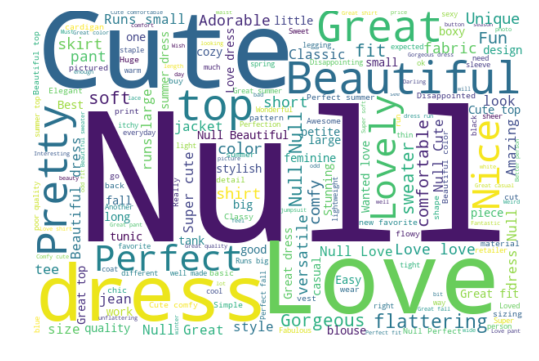

In [23]:
# Using wordcloud for title column
title = new_data['title'].str.cat(sep=' ')

# Creating and generating a wordcloud image
wordcloud = WordCloud(max_words=200, background_color='white', width=600, height=400, margin=0).generate(title)

# Displaying the image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.3. Looking amount of Rating column

In [24]:
new_data['rating'].describe()

count    22628.000000
mean         4.183092
std          1.115911
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [25]:
# Getting value count for the 'rating' column
display(new_data['rating'].value_counts())

5    12527
4     4908
3     2823
2     1549
1      821
Name: rating, dtype: int64

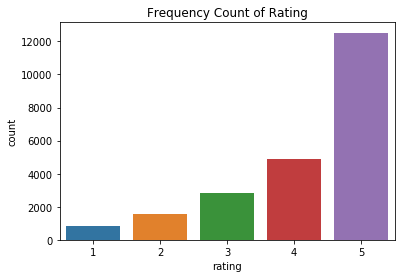

In [26]:
sns.countplot(x='rating', data=new_data)
plt.title('Frequency Count of Rating')
plt.show()

It is possible to observe that the highest number for the product score granted by the customer is 5, which means "Best" for the rating and represents around 55% of the total.

#### 3.4. Looking amount of Recommended IND column

In [27]:
new_data['recommended_ind'].describe()

count    22628.000000
mean         0.818764
std          0.385222
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: recommended_ind, dtype: float64

In [28]:
# Getting value count for the 'recommended_ind' column
display(new_data['recommended_ind'].value_counts())

1    18527
0     4101
Name: recommended_ind, dtype: int64

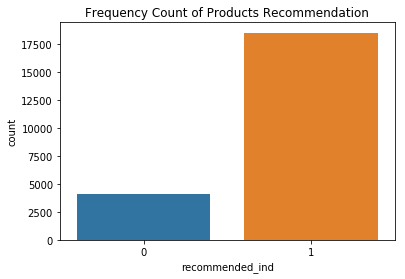

In [29]:
# Plotting countplot to show the distribution of products recommended
sns.countplot(x='recommended_ind', data=new_data)
plt.title('Frequency Count of Products Recommendation')
plt.show()

Considering the plot above, it is possible to see that there are 22,628 products.  It also shows that 18,527 products are recommended by customers and 4,101 products are not recommended, which represents around 82% and 18%, respectively. This data has a significant number of products that are recommended by customers.

#### 3.5. Looking amount of Positive Feedback Count column

In [30]:
new_data['positive_feedback_count'].describe()

count    22628.000000
mean         2.631784
std          5.787520
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: positive_feedback_count, dtype: float64

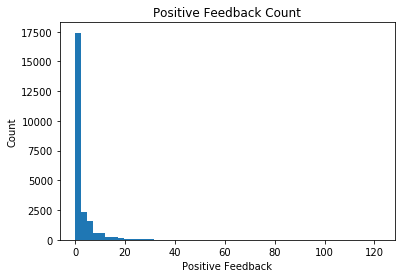

In [31]:
# Plotting histogram to show the distribution of positive feedback count

plt.hist(data["Positive Feedback Count"],bins=50)
plt.xlabel("Positive Feedback")
plt.ylabel("Count")
plt.title("Positive Feedback Count")
plt.show();

Considering the previous results, we can see the distribuitions from other customers who found the review positive.

#### 3.6. Looking some categorical columns

In [32]:
new_data[['division_name', 'department_name', 'class_name']].describe()

,division_name,department_name,class_name
count,22628,22628,22628
unique,3,6,20
top,General,Tops,Dresses
freq,13365,10048,6145


##### 3.6.1. Division name column

This column represents the categorical name of the product considering its high level division.

In [33]:
new_data['division_name'].describe()

count       22628
unique          3
top       General
freq        13365
Name: division_name, dtype: object

In [34]:
# Getting value count for the 'division_name' column
new_data['division_name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: division_name, dtype: int64

It is possible to see that there are three division levels, however, there is one division name that shows the wrong word spelling, so I decided to replace it for the right spelling 'Intimates'.

In [35]:
# Replacing all values of 'Initmates' with 'Intimates'
new_data.replace('Initmates', 'Intimates', inplace=True)

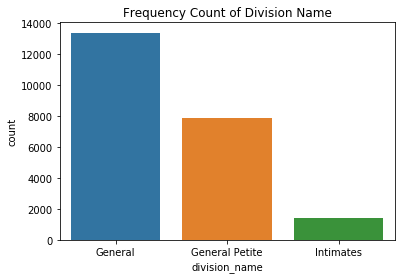

In [36]:
# Plotting countplot to show the distribution of division name
sns.countplot(x='division_name', 
              data=new_data, 
              order=new_data['division_name'].value_counts().index)
plt.title('Frequency Count of Division Name')
plt.show()

Considering the plot above, it is possible to see that the most frequency of products reviewed is in the General division level which represents around 59% of the total.

##### 3.6.2. Department name column

In [37]:
new_data['department_name'].describe()

count     22628
unique        6
top        Tops
freq      10048
Name: department_name, dtype: object

In [38]:
# Getting value count for the 'department_name' column
new_data['department_name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: department_name, dtype: int64

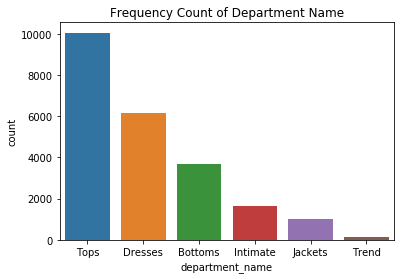

In [39]:
# Plotting countplot to show the distribution of department name
sns.countplot(x='department_name', 
              data=new_data, 
              order=new_data['department_name'].value_counts().index)
plt.title('Frequency Count of Department Name')
plt.show()

Considering the plot above, it is possible to observe that *Tops* and *Dresses* are the products that have the most reviews which represent around 71% of the total.

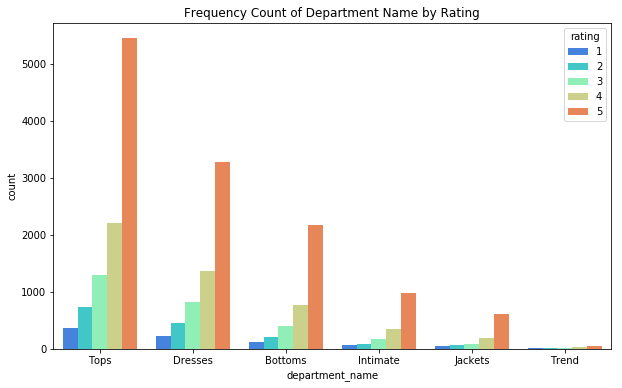

In [40]:
# Plotting histogram to show the distribution of department name by rating
plt.figure(figsize=(10,6))
ax = sns.countplot(x='department_name', 
                   hue='rating', 
                   data=new_data, 
                   palette='rainbow', 
                   order=new_data['department_name'].value_counts().index)
plt.title('Frequency Count of Department Name by Rating')
plt.show()

Moreover, considering the plot above by *Rating*, it is possible to se the distribuition for each categorie by rating.

##### 3.6.3. Class name column

In [41]:
new_data['class_name'].describe()

count       22628
unique         20
top       Dresses
freq         6145
Name: class_name, dtype: object

In [42]:
# Getting value count for the 'class_name' column
new_data['class_name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Chemises             1
Casual bottoms       1
Name: class_name, dtype: int64

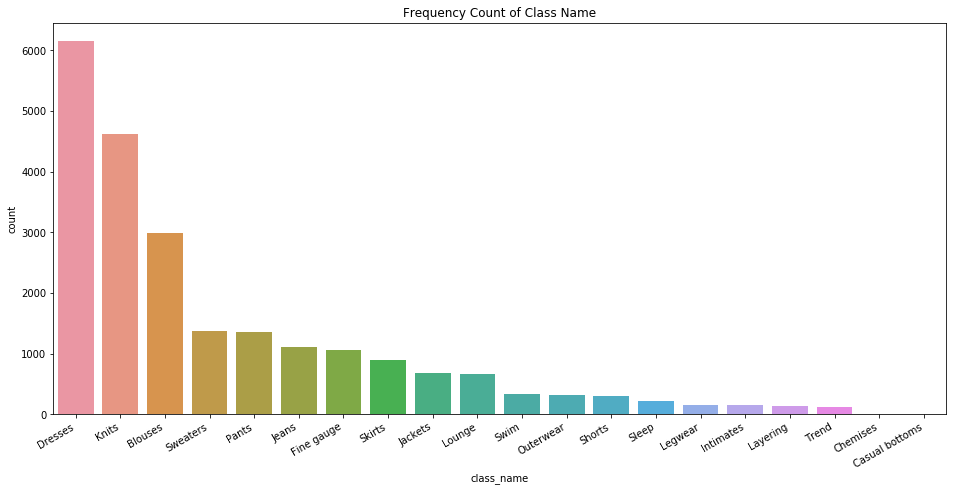

In [43]:
# Plotting countplot to show the distribution of class name
fig = plt.figure(figsize=(16,8))
sns.countplot(x='class_name', 
              data=new_data, 
              order=new_data['class_name'].value_counts().index)
fig.autofmt_xdate()
plt.title('Frequency Count of Class Name')
plt.show()

Considering the previous plot, we can see that *Dresses, Knits and Blouses* are the clothes that present most of the reviews. On the other hand, the clothes least represented are *Casual bottoms and Chemises*, just with 1 review each. 

### Step 4: Using get dummies for categorical features

In [44]:
new_data.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [45]:
# Deciding which categorical features to use in model

for col_name in new_data.columns:
    if new_data[col_name].dtypes == 'object':
        unique = len(new_data[col_name].unique())
        print("Feature '{col_name}' has {unique} unique categories.".format(col_name=col_name, unique=unique))

Feature 'title' has 13984 unique categories.
Feature 'review_text' has 22621 unique categories.
Feature 'division_name' has 3 unique categories.
Feature 'department_name' has 6 unique categories.
Feature 'class_name' has 20 unique categories.


As we know, models can handle only numerical values. Considering the previous results, it is possible to see that for most of the features there are a lot of unique categories. In this case, it is not recommended to use dummies because it will increase the size of the data for categories that have few observations and can impact the results of the model. So, I decided to convert to numeric values the features 'division_name' and 'department_name'.

In [46]:
# Creating a list of features to dummy
dummy_list = ['division_name', 'department_name']

In [47]:
# Using function to dummy two categorical variables
def dummy_data(new_data, dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(new_data[x], prefix=x, dummy_na=False)
        new_data = new_data.drop(x,1)
        new_data = pd.concat([new_data, dummies], axis=1)
    return new_data

In [48]:
clean_data = dummy_data(new_data, dummy_list)

In [49]:
clean_data.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,class_name,division_name_General,division_name_General Petite,division_name_Intimates,department_name_Bottoms,department_name_Dresses,department_name_Intimate,department_name_Jackets,department_name_Tops,department_name_Trend
0,767,33,Null,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,0,0,1,0,0,1,0,0,0
1,1080,34,Null,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,1,0,0,0,1,0,0,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,Dresses,1,0,0,0,1,0,0,0,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,0,1,0,1,0,0,0,0,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,Blouses,1,0,0,0,0,0,0,1,0


In [50]:
clean_data.shape

(22628, 17)

Considering the shape of the dataset, after the process applied to get dummies over two categorical columns we can see that the number of features jumps from 10 to 17 in total.